# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Eric Meyer

#### GitHub Repo: https://github.com/ericmeyer1/web-mining-final-project

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [2]:
# Installing needed python packages for final project
import requests
import pickle
import spacy
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

print('All prereqs installed.')
!pip list


All prereqs installed.
Package            Version
------------------ ------------
annotated-types    0.7.0
asttokens          2.4.1
blis               1.0.1
bs4                0.0.2
catalogue          2.0.10
certifi            2024.8.30
charset-normalizer 3.4.0
click              8.1.7
cloudpathlib       0.20.0
colorama           0.4.6
comm               0.2.2
confection         0.1.5
cymem              2.0.8
debugpy            1.8.8
decorator          5.1.1
en_core_web_sm     3.8.0
executing          2.1.0
html5lib           1.1
idna               3.10
ipykernel          6.29.5
ipython            8.29.0
jedi               0.19.1
Jinja2             3.1.4
joblib             1.4.2
jupyter_client     8.6.3
jupyter_core       5.7.2
langcodes          3.4.1
language_data      1.2.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplotlib-inline  0.1.7
mdurl              0.1.2
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.9.1
numpy      

#### Step 1:
Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [3]:
# Designating the url as a variable
url = "https://mitsloan.mit.edu/ideas-made-to-matter/ai-manufacturing-start-data"

# Using get request to gather the data from webpage
response = requests.get(url)

# Using if/else to test request results and if good, getting html  with beautifulsoup and storing as a pickle file
if response.status_code == 200:
    # Parse the HTML with BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")
    articleHtml = str(soup)

    # Save the parsed HTML content to a .pkl file
    with open("article_html.pkl", "wb") as file:
        pickle.dump(articleHtml, file)
    print("HTML content successfully saved to article_html.pkl")
else:
    print(f"Failed to fetch the page. Status code: {response.status_code}")

HTML content successfully saved to article_html.pkl


#### Step 2:
Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [4]:
# Loading HTML content from our pickle file
with open("article_html.pkl", "rb") as file:
    htmlContent = pickle.load(file)

# Parsing the loaded HTML with BeautifulSoup
soup = BeautifulSoup(htmlContent, "html.parser")

# Getting only the article we are after from this webpage
onlyArticle = soup.find("article")

# Extracting and printing the plain text content of the HTML
articleText = onlyArticle.get_text()

# Loading spacy with the spaCyTextBlob pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

# Performing sentiment analysis on the article text
doc = nlp(articleText)
polarityScore = doc._.blob.polarity
print(f"\nPolarity score: {polarityScore}")
print(f"\nWith the polarity score closer to 1 then -1, this score is more postive than negative.")

# Counting the number of sentences in this article
numberSentences = len(list(doc.sents))
print(f"\nNumber of sentences in the article: {numberSentences}")


Polarity score: 0.08701180832368952

With the polarity score closer to 1 then -1, this score is more postive than negative.

Number of sentences in the article: 44


#### Step 3:
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [5]:
# Importing spacy and counter for this portion of the project
import spacy
from collections import Counter

# Loading the spaCy model
nlp = spacy.load("en_core_web_sm")

# Processing the text with spaCy
doc = nlp(articleText)

# Filter tokens: remove stopwords, punctuation, and whitespace
tokens = [
    token.text.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count token frequencies
tokenCounts = Counter(tokens)

# Get the 5 most common tokens
mostCommonTokens = tokenCounts.most_common(5)

# Print the results
print("Top 5 Most Frequent Tokens:")
for token, freq in mostCommonTokens:
    print(f"Token: '{token}', Frequency: {freq}")

Top 5 Most Frequent Tokens:
Token: 'ai', Frequency: 45
Token: 'data', Frequency: 23
Token: 'manufacturing', Frequency: 14
Token: 'generative', Frequency: 8
Token: 'models', Frequency: 7


#### Step 4:
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [6]:
# Filtering lemmas: removing stopwords, punctuation, and whitespace (NOTE: using doc variable from previous step which is the nlp result of our article text)
lemmas = [
    token.lemma_.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Counting lemma frequencies
lemmaCounts = Counter(lemmas)

# Getting the 5 most common lemmas
mostCommonLemmas = lemmaCounts.most_common(5)

# Printing the results
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in mostCommonLemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

Top 5 Most Frequent Lemmas:
Lemma: 'ai', Frequency: 45
Lemma: 'datum', Frequency: 14
Lemma: 'manufacturing', Frequency: 13
Lemma: 'model', Frequency: 9
Lemma: 'data', Frequency: 9


#### Step 5:
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

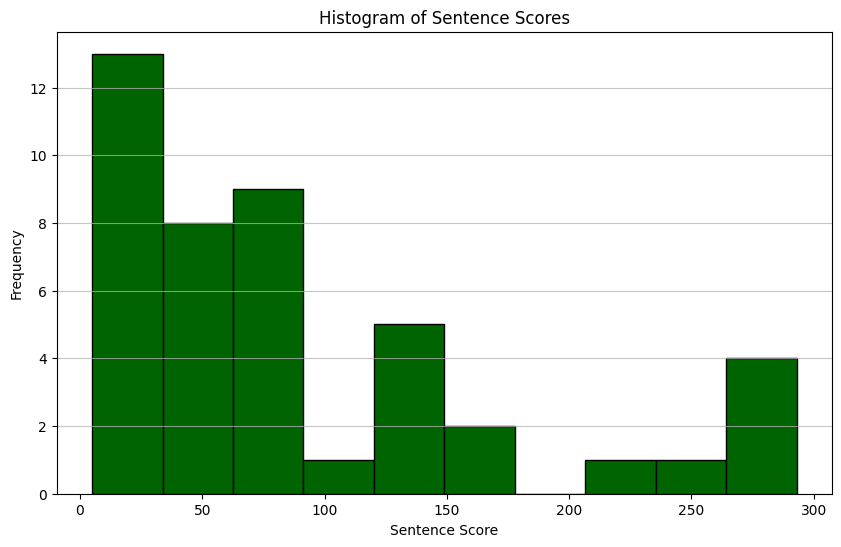

In [9]:
# Loading the spaCy model
nlp = spacy.load("en_core_web_sm")

# Processing our previous text with spaCy
doc = nlp(articleText)

# Filtering tokens again: remove stopwords, punctuation, and whitespace
tokens = [
    token.text.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Counting token frequencies
tokenCounts = Counter(tokens)

# Scoring each sentence and storing as a list
sentenceScores = [
    sum(tokenCounts[token.text.lower()] for token in sentence if token.text.lower() in tokenCounts)
    for sentence in doc.sents
]

# Plotting a histogram of sentence scores
plt.figure(figsize=(10, 6))
plt.hist(sentenceScores, bins=10, color='darkgreen', edgecolor='black')
plt.title("Histogram of Sentence Scores")
plt.xlabel("Sentence Score")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Broadly, the most common scores are clearly from around the 1 to 90 range. The top scoring range is the 1 to 35 range.

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?